## Problem Statement:

 The objective of my data science project is to visualize the relationship between a person's lifestyle and the likelihood of developing diabetes. By analyzing lifestyle factors such as smoking habits, physical activity, fruit consumption, use of health trackers, and income levels, this dataset aims to predict whether these lifestyle choices impact a person's risk of diabetes. The goal is to identify the key lifestyle indicators that influence diabetes risk, which could assist healthcare providers in early intervention efforts to prevent diabetes onset.

In [ ]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV


## Data pre-processing and prepping

In [ ]:
df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
#Checking the data type of each column
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
#Value counts of our target_variable
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [ ]:
df['GenHlth'].value_counts()

GenHlth
2.0    89084
3.0    75646
1.0    45299
4.0    31570
5.0    12081
Name: count, dtype: int64

In [ ]:
#Converting each datatype into its correct datatype
#categorical variable
categorical_columns = ['Diabetes_012','Age', 'Education', 'Income', 'GenHlth']
#Rest of the columns (binary indicators)
integer_columns = df.columns.difference(categorical_columns)
#continuous variable
float_columns = ['BMI','MentHlth', 'PhysHlth']
integer_columns=integer_columns.drop(float_columns)


In [ ]:
#converting into desired types:
df[categorical_columns] = df[categorical_columns].astype('int64').astype('category')
df[integer_columns] = df[integer_columns].astype('int64')
df[float_columns] = df[float_columns].astype('float64')

In [ ]:
df.dtypes

Diabetes_012            category
HighBP                     int64
HighChol                   int64
CholCheck                  int64
BMI                      float64
Smoker                     int64
Stroke                     int64
HeartDiseaseorAttack       int64
PhysActivity               int64
Fruits                     int64
Veggies                    int64
HvyAlcoholConsump          int64
AnyHealthcare              int64
NoDocbcCost                int64
GenHlth                 category
MentHlth                 float64
PhysHlth                 float64
DiffWalk                   int64
Sex                        int64
Age                     category
Education               category
Income                  category
dtype: object

CHECK FOR MISSING VALUES:

In [ ]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There's no missing values. Let's move on with invalid values in the dataset.

In [ ]:
#BINARY CHECK
df[integer_columns].apply(lambda x: ((x != 0) & (x != 1)).sum())

AnyHealthcare           0
CholCheck               0
DiffWalk                0
Fruits                  0
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
HvyAlcoholConsump       0
NoDocbcCost             0
PhysActivity            0
Sex                     0
Smoker                  0
Stroke                  0
Veggies                 0
dtype: int64

In [ ]:
#CATEGORY CHECK FOR CATEGORICAL COLUMNS
for i in categorical_columns:
  print(df[i].value_counts())

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64
Age
9     33244
10    32194
8     30832
7     26314
11    23533
6     19819
13    17363
5     16157
12    15980
4     13823
3     11123
2      7598
1      5700
Name: count, dtype: int64
Education
6    107325
5     69910
4     62750
3      9478
2      4043
1       174
Name: count, dtype: int64
Income
8    90385
7    43219
6    36470
5    25883
4    20135
3    15994
2    11783
1     9811
Name: count, dtype: int64
GenHlth
2    89084
3    75646
1    45299
4    31570
5    12081
Name: count, dtype: int64


#### There's no invalid value in the dataset

Outlier check

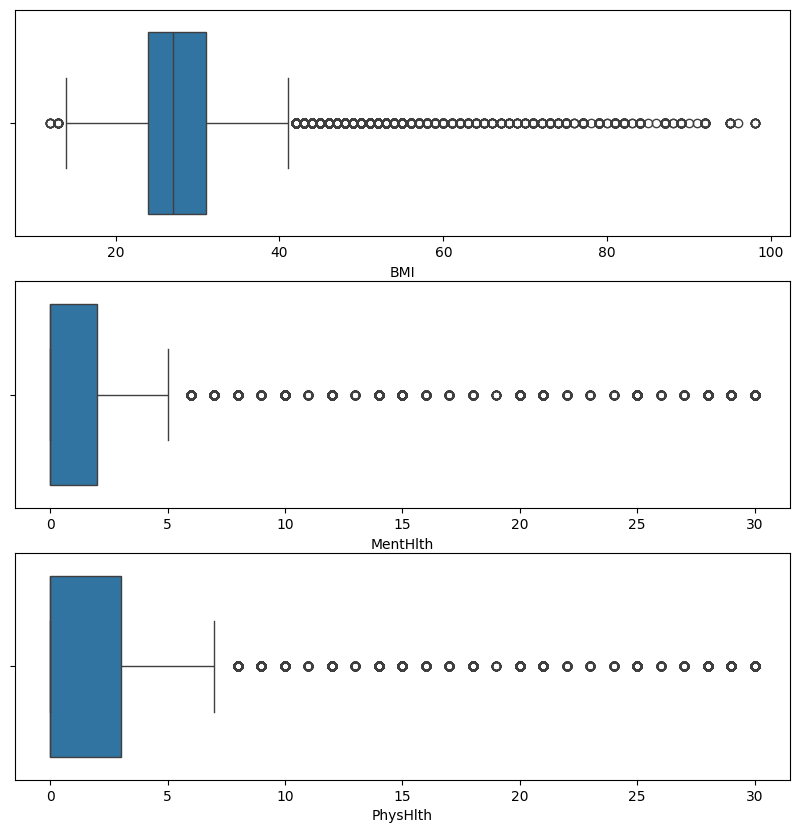

In [ ]:

#Checking the outlier through box plot of float columns
fig, ax = plt.subplots(3,1, figsize=(10,10))
for i,j in enumerate(float_columns):
  sns.boxplot(x=df[j], ax=ax[i])

### Outlier Analysis
####1. BMI: Several points are far beyond the typical range, which could indicate measurement errors or extreme cases.
####2. MentHlth and PhysHlth: These represent days affected by mental or physical health issues respectively. The outliers suggest that some respondents reported the maximum possible days, which might be true extremes or data entry exaggerations.

##### We will plan to scale these continous variables to handle outliers. Removing the outliers can impact the class record for person having diabetes because person having higher BMI, PhysHlth, MentHlth

## EDA

#### Let's analyze our class distribution

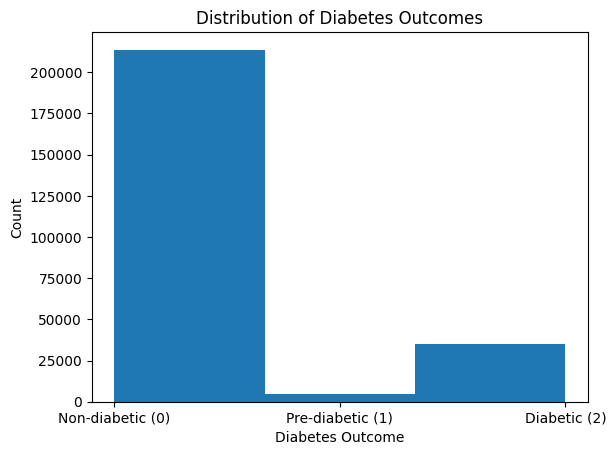

In [ ]:
#Distribution of our target variable through histogram
plt.hist(df['Diabetes_012'], bins=3)
plt.title('Distribution of Diabetes Outcomes')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.xticks([0,1,2], ['Non-diabetic (0)', 'Pre-diabetic (1)', 'Diabetic (2)'])
plt.show()

#### There's a huge class imbalance and would require some sort of sampling or assigning class weights to minority class to avoid Biasness towards Non-diabetic person.

Let's see the relationship of Diabetes_012 column with other variables

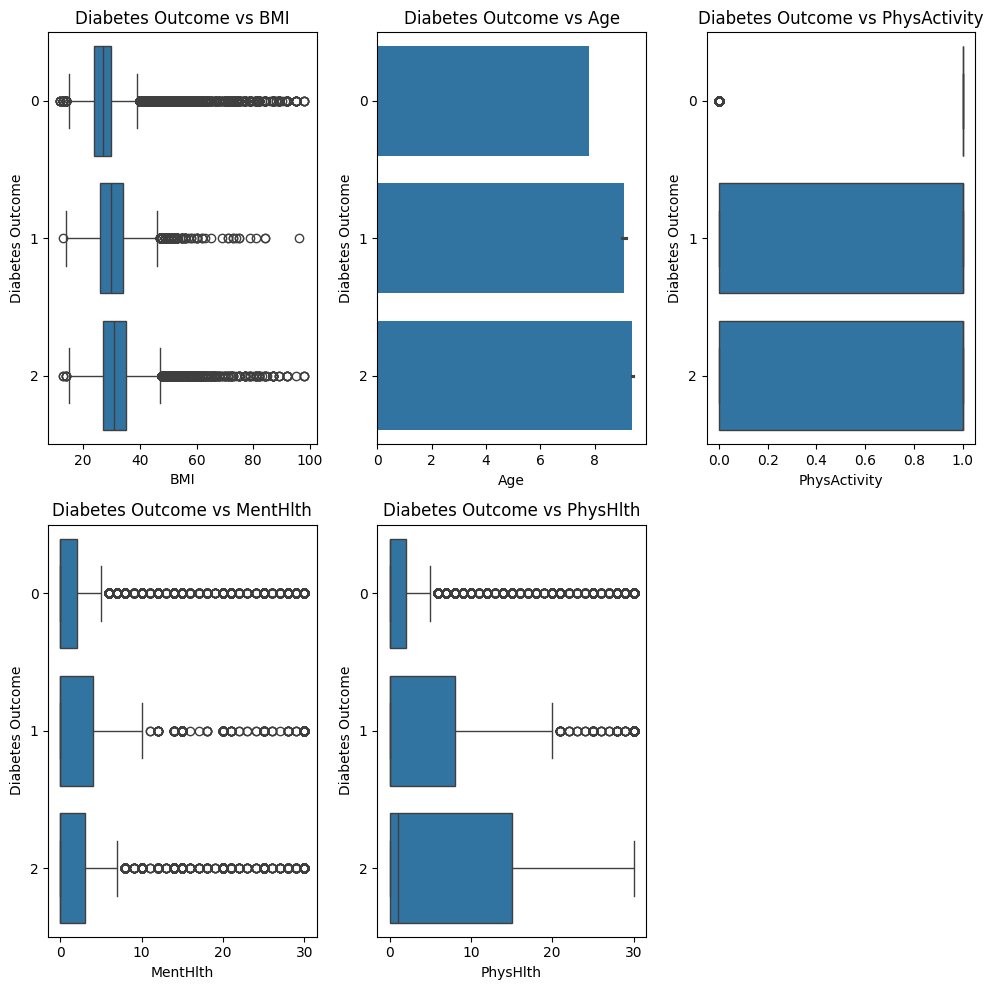

In [ ]:
significant_vars = ['BMI', 'Age', 'PhysActivity', 'MentHlth', 'PhysHlth']
plt.figure(figsize=(10, 10))
for i, var in enumerate(significant_vars):
    plt.subplot(2, 3, i+1)
    if var =='Age':
      #horizontal plot
      sns.barplot(x=df[var], y=df['Diabetes_012'], orient='h')
    else:
      sns.boxplot(x=df[var], y=df['Diabetes_012'])
    plt.title(f'Diabetes Outcome vs {var}')
    plt.ylabel('Diabetes Outcome')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

####Analysis
####1. BMI vs. Diabetes Outcome: Higher BMI values tend to cluster more around higher diabetes outcomes (pre-diabetic and diabetic). This suggests a potential correlation where higher BMI might be associated with an increased risk of diabetes.
####2. Age vs. Diabetes Outcome: Older ages appear to have a higher concentration of diabetic outcomes, indicating age as a significant risk factor.
####3. Physical Activity (PhysActivity) vs. Diabetes Outcome: Lower levels of physical activity correspond to higher diabetes outcomes, supporting the hypothesis that physical inactivity may be associated with an increased risk of diabetes.
#### 4. Mental Health (MentHlth) and Physical Health (PhysHlth) vs. Diabetes Outcome: Both show varied distributions, suggesting that worse health scores (both mental and physical) might be associated with higher diabetes outcomes.

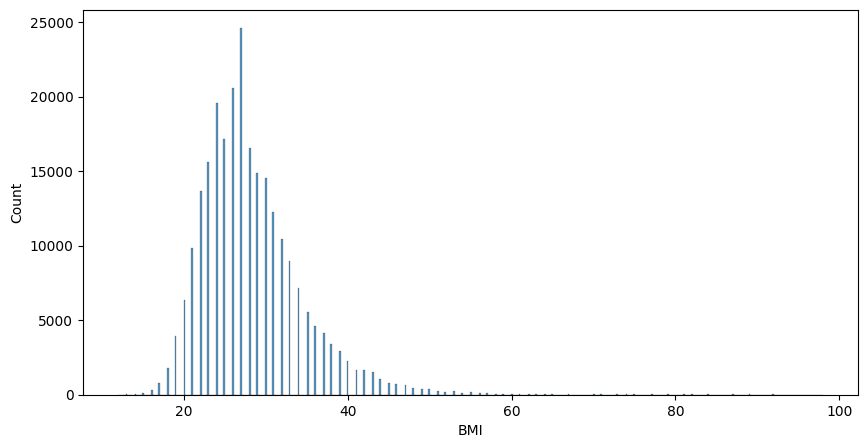

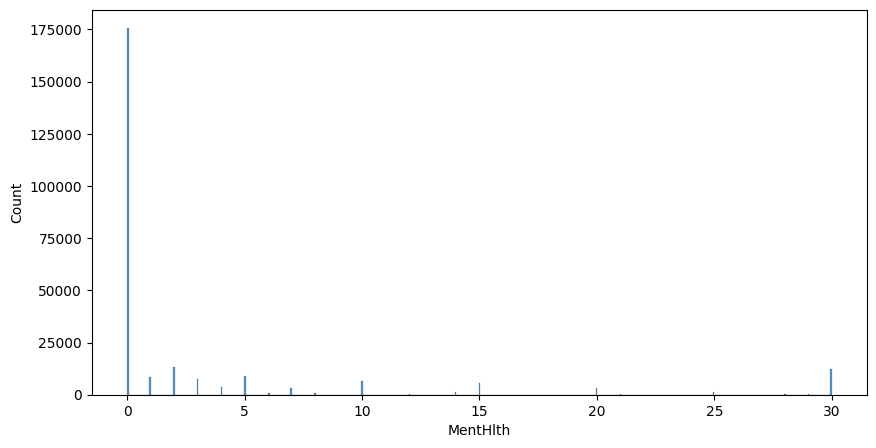

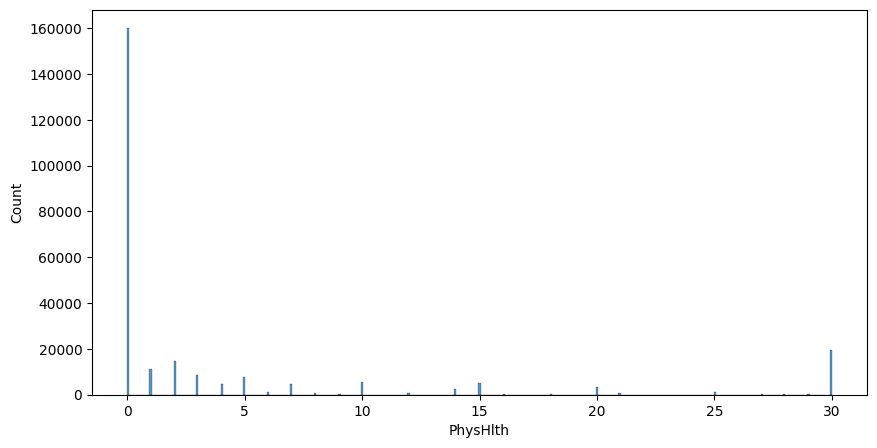

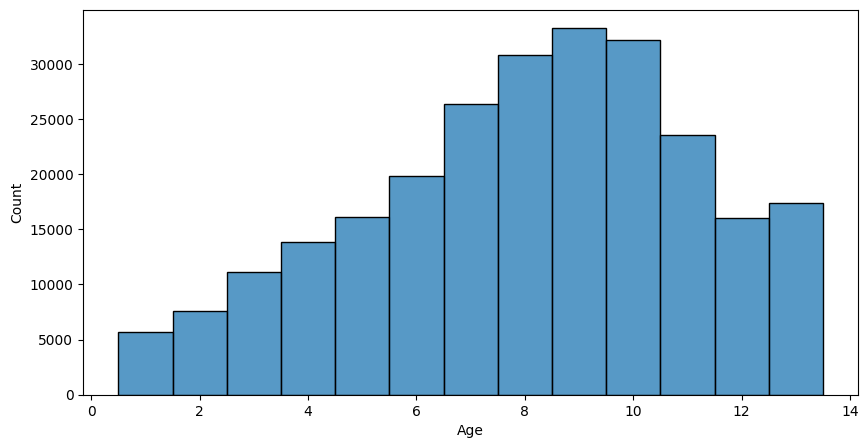

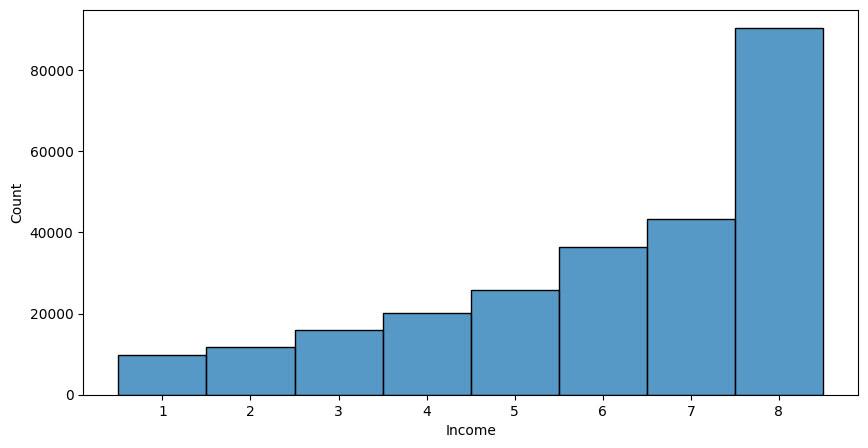

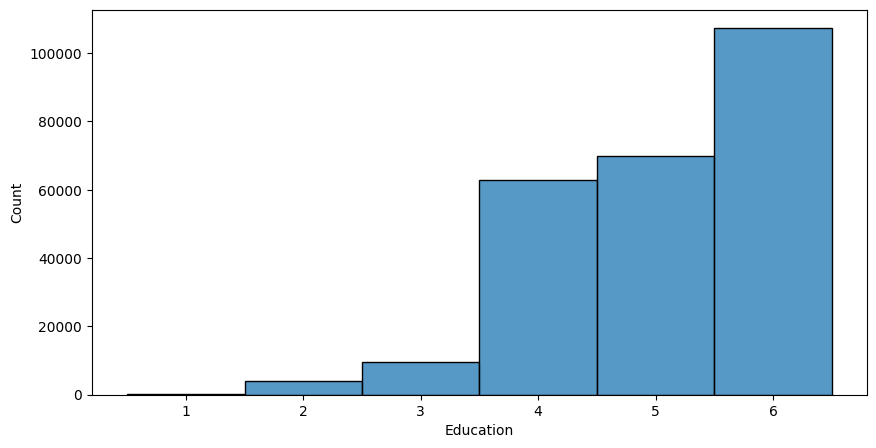

In [ ]:
continuous_columns = ['BMI', 'MentHlth', 'PhysHlth','Age','Income','Education']
for i, var in enumerate(continuous_columns):
    plt.figure(figsize=(10, 5))

    sns.histplot(x=df[var])

Analysis of the distribution of continuous variable:
1. Education and Income shows strong left skewness, might require square root transformation.
2. Age and BMI have a normal distribution and can be left as it is.
2. PhysHlth and MentHlth have almost similar distribution with right skewness to it.

#Question 4a — (20 points)

Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.
Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.
Note: if you are using correlations, ensure that this is only performed using continuous variables.

###Correlation Matrix with continuous columns

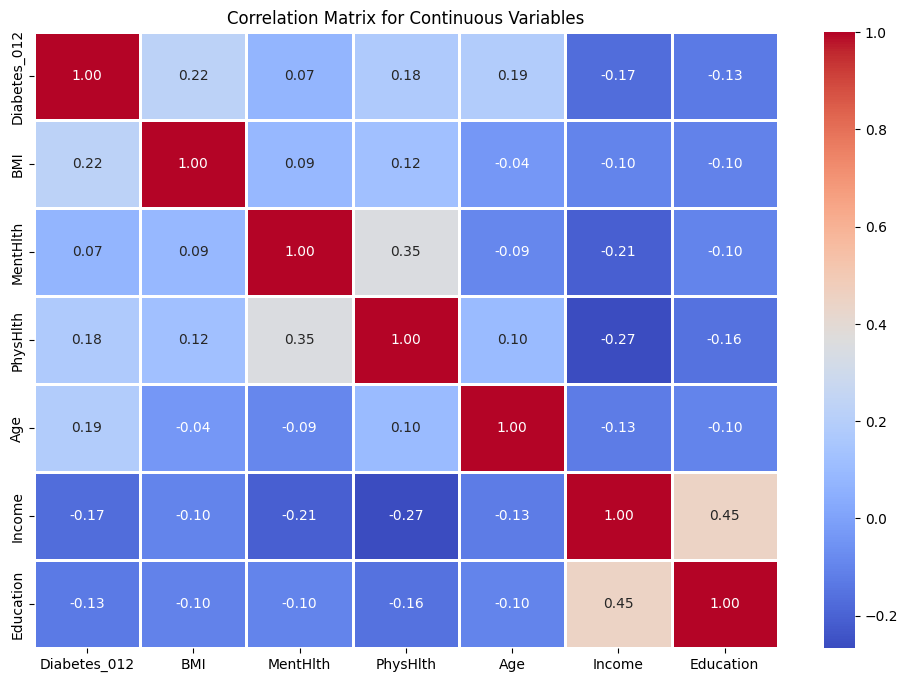

In [ ]:
continuous_columns = ['BMI', 'MentHlth', 'PhysHlth','Age','Income','Education']
correlation_matrix = df[['Diabetes_012'] + continuous_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Matrix for Continuous Variables')
plt.show()

####Analysis
#####1. BMI shows a moderate positive correlation with diabetes outcomes, suggesting that as BMI increases, so does the likelihood of being diabetic or pre-diabetic.
#####2. Age also has a moderate positive correlation with diabetes outcomes, indicating that older individuals have a higher likelihood of having diabetes.
#####3. Income and Education show a slight negative correlation with diabetes outcomes, hinting that higher income and education levels may be associated with lower diabetes prevalence.

Multicollinearilty test with the variables

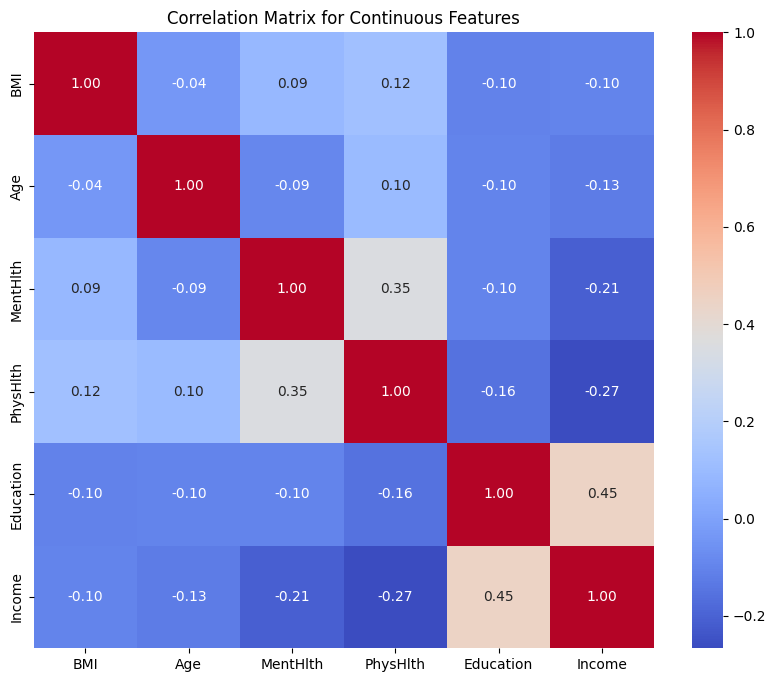

In [ ]:
correlation_matrix = df[['BMI', 'Age', 'MentHlth', 'PhysHlth', 'Education', 'Income']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Continuous Features')
plt.show()

That is a good sign to see that significant variables are not correlated with each other. (0.45 is a moderate relation)

#### Statistical T-test

In [ ]:
from scipy.stats import ttest_ind

# Function to perform t-test for binary categorical variables
def perform_t_test(df, binary_var, outcome_var):
    group1 = df[df[binary_var] == 0][outcome_var]
    group2 = df[df[binary_var] == 1][outcome_var]
    t_stat, p_value = ttest_ind(group1, group2)
    return p_value

# Perform t-tests for binary variables
t_test_results = {col: perform_t_test(df, col, 'Diabetes_012') for col in integer_columns}

t_test_results

{'AnyHealthcare': 8.352510294125502e-15,
 'CholCheck': 2.9226496801950494e-254,
 'DiffWalk': 0.0,
 'Fruits': 2.6712984611666195e-100,
 'HeartDiseaseorAttack': 0.0,
 'HighBP': 0.0,
 'HighChol': 0.0,
 'HvyAlcoholConsump': 3.742460526107258e-187,
 'NoDocbcCost': 2.7250905786505774e-71,
 'PhysActivity': 0.0,
 'Sex': 4.037645119313583e-55,
 'Smoker': 8.502350805417565e-221,
 'Stroke': 0.0,
 'Veggies': 3.3635933901970745e-194}

### Since the p-values of all the variables are coming out to be very low and given that the variables semantic meaning shows a good relation with the target variable, it seems fair to use all.

### Feature Selection:

In [ ]:
df[final_features]

,BMI,Age,PhysHlth,Income,Diabetes_012,CholCheck,DiffWalk,Fruits,HeartDiseaseorAttack,HighBP,HighChol,HvyAlcoholConsump,NoDocbcCost,PhysActivity,Sex,Smoker,Stroke,Veggies
0,40.0,9,15.0,3,0,1,1,0,0,1,1,0,0,0,0,1,0,1
1,25.0,7,0.0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0
2,28.0,9,30.0,8,0,1,1,1,0,1,1,0,1,0,0,0,0,0
3,27.0,11,0.0,6,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4,24.0,11,0.0,4,0,1,0,1,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,45.0,5,5.0,7,0,1,0,1,0,1,1,0,0,0,1,0,0,1
253676,18.0,11,0.0,4,2,1,1,0,0,1,1,0,0,0,0,0,0,0
253677,28.0,2,0.0,2,0,1,0,1,0,0,0,0,0,1,0,0,0,0
253678,23.0,7,0.0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1


### Feature engineering

In [ ]:

#Feature Engineering: Combining Fruits and Veggies by naming it as Diet Index.
df['DietIntake'] = df['Fruits'] + df['Veggies']
#Performing t-test with target variable to check its significance
perform_t_test(df, 'DietIntake', 'Diabetes_012')

3.080147077410662e-20

Value is pretty small, we can use it instead of Fruits and Veggies

In [ ]:
from scipy.stats import chi2_contingency

# Function to perform chi-square test and return p-value
def perform_chi_square_test(data, categorical_var, outcome_var):
    contingency_table = pd.crosstab(data[categorical_var], data[outcome_var])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

# Perform chi-square tests for 'Education' and 'Income'
chi_square_results = {
    "Education": perform_chi_square_test(df, 'Education', 'Diabetes_012'),
    "Income": perform_chi_square_test(df, 'Income', 'Diabetes_012'),
    "Age": perform_chi_square_test(df, 'Age', 'Diabetes_012'),
    "GenHlth": perform_chi_square_test(df, 'GenHlth', 'Diabetes_012'),
}

chi_square_results


{'Education': 0.0, 'Income': 0.0, 'Age': 0.0, 'GenHlth': 0.0}

In [ ]:
#Final feature selection from correlation and t-test
final_features = ['BMI', 'Age', 'PhysHlth', 'Income','Diabetes_012'] #correlation
#Based on t-test
final_features.extend(['CholCheck','DiffWalk','Fruits','HeartDiseaseorAttack','HighBP','HighChol','HvyAlcoholConsump','NoDocbcCost','PhysActivity','Sex','Smoker','Stroke','Veggies'])


In [ ]:
data = df[final_features]

In [ ]:
data.head()

,BMI,Age,PhysHlth,Income,Diabetes_012,CholCheck,DiffWalk,Fruits,HeartDiseaseorAttack,HighBP,HighChol,HvyAlcoholConsump,NoDocbcCost,PhysActivity,Sex,Smoker,Stroke,Veggies
0,40.0,9,15.0,3,0,1,1,0,0,1,1,0,0,0,0,1,0,1
1,25.0,7,0.0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0
2,28.0,9,30.0,8,0,1,1,1,0,1,1,0,1,0,0,0,0,0
3,27.0,11,0.0,6,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4,24.0,11,0.0,4,0,1,0,1,0,1,1,0,0,1,0,0,0,1


In [ ]:
data.dtypes

BMI                      float64
Age                     category
PhysHlth                 float64
Income                  category
Diabetes_012            category
CholCheck                  int64
DiffWalk                   int64
Fruits                     int64
HeartDiseaseorAttack       int64
HighBP                     int64
HighChol                   int64
HvyAlcoholConsump          int64
NoDocbcCost                int64
PhysActivity               int64
Sex                        int64
Smoker                     int64
Stroke                     int64
Veggies                    int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImblearnPipeline

# Load and prepare the data
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Specify the numeric, binary, and categorical features
numeric_features = ['BMI', 'PhysHlth']
binary_features = ['CholCheck', 'DiffWalk','Fruits', 'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'HvyAlcoholConsump', 'NoDocbcCost', 'PhysActivity', 'Sex', 'Smoker', 'Stroke', 'Veggies']
categorical_features = ['Age', 'Income']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('bin', 'passthrough', binary_features)  # Passthrough binary features
    ])



In [ ]:
# Define the SMOTE oversampling strategy
oversample = SMOTE(random_state=42)

# Create a pipeline that includes preprocessing and SMOTE
pipeline = ImblearnPipeline([
    ('preprocessor', preprocessor),
    ('smote', oversample)
])

# Apply preprocessing and SMOTE to the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# You can now check the class distribution after applying SMOTE
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({0: 149592, 2: 149592, 1: 149592})


## Modeling

### Random Forest Classifier

In [ ]:

model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=3, verbose =1)
grid_search.fit(X_train_resampled, y_train_resampled)

# # Evaluate the model
# predictions = grid_search.predict(X_test)
# print(classification_report(y_test, predictions))


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]},
             verbose=1)

In [ ]:
#transform X_test using only the preprocessor part of the pipeline
X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)

# Now use the best estimator from the grid search to make predictions
predictions = grid_search.predict(X_test_preprocessed)

# Evaluation
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.90      0.86      0.88     64111
           1       0.03      0.01      0.01      1389
           2       0.37      0.50      0.43     10604

    accuracy                           0.80     76104
   macro avg       0.43      0.46      0.44     76104
weighted avg       0.81      0.80      0.80     76104



In [ ]:
best_model_rf = grid_search.best_estimator_
best_score_rf = grid_search.best_score_
best_params = grid_search.best_params_
cv_results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
print('Best Model:', best_model_rf)
print('Best Score:', round(best_score_rf,3))
print('Best Params:', best_params)
print('CV Results')
display(display(cv_results[['param_n_estimators', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']]))

Best Model: RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
Best Score: 0.868
Best Params: {'max_depth': 20, 'n_estimators': 200}
CV Results


,param_n_estimators,param_max_depth,mean_test_score,std_test_score,rank_test_score
0,100,10,0.670513,0.011848,3
1,200,10,0.669512,0.011013,4
2,100,20,0.867954,0.028792,2
3,200,20,0.868435,0.028500,1


None

### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Define the model and parameters for KNN
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance']
}

# Setup GridSearchCV without using a pipeline
grid_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy')
grid_knn.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Now use the best estimator from the grid search to make predictions
X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)
predictionsKNN = grid_knn.predict(X_test_preprocessed)

# Evaluation
print(classification_report(y_test, predictionsKNN))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84     64111
           1       0.03      0.07      0.04      1389
           2       0.29      0.41      0.34     10604

    accuracy                           0.73     76104
   macro avg       0.40      0.43      0.41     76104
weighted avg       0.79      0.73      0.76     76104



In [ ]:
best_model_knn = grid_knn.best_estimator_
best_score_knn = grid_knn.best_score_
best_params_knn = grid_knn.best_params_
cv_results_knn = pd.DataFrame(grid_knn.cv_results_)

In [ ]:
print('Best Model:', best_model_knn)
print('Best Score:', round(best_score_knn,3))
print('Best Params:', best_params_knn)
print('CV Results')
display(display(cv_results_knn[['param_n_neighbors', 'param_weights', 'mean_test_score', 'std_test_score']]))

Best Model: KNeighborsClassifier(n_neighbors=3, weights='distance')
Best Score: 0.877
Best Params: {'n_neighbors': 3, 'weights': 'distance'}
CV Results


,param_n_neighbors,param_weights,mean_test_score,std_test_score
0,3,uniform,0.864899,0.004186
1,3,distance,0.876854,0.007693
2,5,uniform,0.846560,0.003211
3,5,distance,0.868257,0.007622


None

### Multinomial Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Set up the Multinomial Logistic Regression model
mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
param_grid_mlr = {
    'C': [1, 10],
    'penalty': ['l2'],
    'max_iter': [1000, 1500]
}

# Perform Grid Search
grid_mlr = GridSearchCV(mlr, param_grid_mlr, cv=3, scoring='accuracy', return_train_score=True)
grid_mlr.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=42),
             param_grid={'C': [1, 10], 'max_iter': [1000, 1500],
                         'penalty': ['l2']},
             return_train_score=True, scoring='accuracy')

In [ ]:
predictionsMLR = grid_mlr.predict(X_test_preprocessed)

# Evaluation
print(classification_report(y_test, predictionsMLR))

              precision    recall  f1-score   support

           0       0.95      0.64      0.76     64111
           1       0.03      0.30      0.05      1389
           2       0.34      0.57      0.42     10604

    accuracy                           0.62     76104
   macro avg       0.44      0.50      0.41     76104
weighted avg       0.84      0.62      0.70     76104



In [ ]:
best_model_mlr = grid_mlr.best_estimator_
best_score_mlr = grid_mlr.best_score_
best_params_mlr = grid_mlr.best_params_
cv_results_mlr = pd.DataFrame(grid_mlr.cv_results_)

In [ ]:
print('Best Model:', best_model_mlr)
print('Best Score:', round(best_score_mlr,3))
print('Best Params:', best_params_mlr)
print('CV Results')
display(display(cv_results_mlr[['param_C', 'param_penalty', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]))

Best Model: LogisticRegression(C=1, max_iter=1000, multi_class='multinomial',
                   random_state=42)
Best Score: 0.522
Best Params: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
CV Results


,param_C,param_penalty,mean_test_score,std_test_score,mean_train_score,std_train_score
0,1,l2,0.522122,0.001851,0.522248,0.000261
1,1,l2,0.522122,0.001851,0.522248,0.000261
2,10,l2,0.522118,0.001867,0.522238,0.000277
3,10,l2,0.522118,0.001867,0.522238,0.000277


None

### Support Vector Machine (SVM)


In [ ]:
from sklearn.svm import SVC

#loading the classification
svc = SVC(random_state=42)

# Using grid search to tune for the best parameters
parameters_grid_svm = {
    'C': [1, 10],  # Tuning best regularization parameter
    'kernel': ['rbf', 'poly']  # Kernel to be used. Using kernels as they might capture non linear relation if it exists
}

# Performing grid search and cross validating it 3 times.
grid_search_svm = GridSearchCV(svc, parameters_grid_svm, cv=3, return_train_score=True)

#Training the model
grid_search_svm.fit(X_train_resampled, y_train_resampled)

## Analysis and Evaluation

### Random Forest Classifier
Best Model : RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

Best Score : 0.868

The classification report provides key metrics for each class (0, 1, 2) in the model:

Class 0: Shows high precision, recall, and F1-score, indicating that the model performs well in identifying and predicting non-diabetic outcomes.
Class 1: Has extremely low precision, recall, and F1-score, suggesting that the model struggles significantly with predicting pre-diabetic outcomes accurately.
Class 2: Has moderate precision and recall, but these metrics are not as high as for Class 0, indicating some challenges in predicting diabetic outcomes but still reasonably effective compared to Class 1.
The model is biased towards predicting non-diabetic outcomes (Class 0) much more effectively than pre-diabetic or diabetic outcomes. The very poor performance on Class 1 could be due to underrepresentation in the dataset, or the features not being indicative enough for this class, or both.

Lower max_depth can lead to higher bias as the model is potentially too simple to capture the underlying patterns in the data. THe results suggest that a max_depth of 10 might be too simplistic as performance improves significantly with max_depth of 20. Higher max_depth can increase model complexity, which might lead to overfitting. However, the standard deviation of test scores (indicative of variability in model performance across different folds) does not increase substantially with higher max_depth, suggesting that the model does not suffer excessively from high variance, at least within the range tested.

The Random Forest model demonstrated robust performance with strong precision in predicting non-diabetic cases but struggled with lower accuracy in predicting pre-diabetic and diabetic cases.
  

### KNN Classifier
Best Model: KNeighborsClassifier(n_neighbors=3, weights='distance')

Best Score: 0.877


The classification report provides the following metrics for each class:

Class 0 (Non-diabetic):

Precision: High at 0.89, indicating that the model is very good at not labeling non-diabetic cases as diabetic or pre-diabetic.
Recall: Also relatively high at 0.80, showing that it successfully identifies a good portion of actual non-diabetic cases.
F1-Score: An F1-score of 0.84 reflects a good balance between precision and recall for this class.

Class 1 (Pre-diabetic):

Precision: Very low at 0.03, suggesting the model rarely identifies pre-diabetic cases correctly.
Recall: Also very low at 0.07, meaning it misses many actual pre-diabetic cases.
F1-Score: At 0.04, the F1-score is extremely low, indicating poor performance for this class.


Class 2 (Diabetic):

Precision: Moderate at 0.29, indicating the model has some capability to correctly identify diabetic cases but also makes several false positives.
Recall: At 0.41, it captures less than half of the actual diabetic cases.
F1-Score: The score of 0.34 suggests modest effectiveness for this class but indicates room for improvement.
Overall Accuracy: The overall accuracy is 0.73, which might seem reasonable but is heavily biased towards the majority class (Class 0).

There is a clear indication of bias towards the majority class (Class 0). The model performs well in identifying non-diabetic cases but struggles significantly with pre-diabetic cases, suggesting underfitting for minority classes. The relatively low standard deviation in test scores between different configurations suggests that the model isn't experiencing high variance.

The KNN classifier showed good performance for the non-diabetic class but significantly underperformed for pre-diabetic and diabetic classes, indicating difficulties in handling class imbalances.

### Multinomial Logistic Regression
Best Model:LogisticRegression(C=1, max_iter=1000, multi_class='multinomial',
                   random_state=42)

Best Score: 0.522


Class 0 (Non-diabetic):

Precision: High (0.95), indicating a strong accuracy in predicting non-diabetic outcomes when the model does predict this class.
Recall: Moderate (0.64), suggesting that the model misses a significant number of true non-diabetic cases.
F1-Score: Fairly high (0.76), showing a decent balance between precision and recall for this class.

Class 1 (Pre-diabetic):

Precision: Extremely low (0.03), meaning the model rarely predicts this class correctly.
Recall: Low (0.30), indicating the model misses many pre-diabetic cases.
F1-Score: Very poor (0.05), reflecting the model's ineffective performance for this class.

Class 2 (Diabetic):

Precision: Low (0.34), suggesting many false positives (non-diabetic or pre-diabetic cases wrongly identified as diabetic).
Recall: Moderate (0.57), meaning the model captures over half of the actual diabetic cases but still misses a considerable number.
F1-Score: Moderate (0.42), indicating a need for improvement in balancing precision and recall for this class.

The model shows a high bias towards Class 0, which it predicts quite well compared to the other classes. This could be indicative of a model that isn't complex enough to capture the nuances of Classes 1 and 2, possibly due to a lack of relevant features or insufficient representation of these classes in the training data. The model has low variance, as indicated by the small standard deviations in cross-validation scores, suggesting that changes in the training dataset have little effect on the outcome. This stability, while generally positive, comes at the cost of high bias — particularly toward predicting Classes 1 and 2 inadequately.

While the model performs consistently, it does so at a generally low level of accuracy, with significant room for improvement in its application for predicting diabetic outcomes. Addressing its high bias while maintaining low variance is crucial for enhancing its effectiveness in a healthcare setting. The MLR model consistently underperformed across all classes, particularly struggling with pre-diabetic classifications, indicating a high bias toward the majority class.


 Since this is a classification problem, the metrics used are accuracy, precision, recall and f1-score. In the specific case of healthcare, recall is preferred over other metrics. Recall measures the proportion of actual positives that are correctly identified. In many healthcare scenarios, especially those involving the diagnosis of serious conditions, a high recall is crucial because the cost of missing a true positive (failing to identify a disease) can be very high, potentially life-threatening.  Additionally, even in cases where the disease prediction might be incorrect, a physician's assessment will ultimately confirm the presence or absence of diabetes, providing a secondary check.

## Potential impacts and bias

Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.

Patients, especially those at risk of diabetes, stand to benefit directly as they can receive earlier and more targeted interventions, potentially preventing the progression of the disease. Healthcare providers, including clinicians and hospitals, will benefit from more accurate diagnostic tools, aiding in better patient management and optimized treatment plans. Additionally, healthcare systems will experience improved resource allocation and reduced costs by preventing severe complications through early treatment.

The models showed a tendency to perform well in predicting the majority class (non-diabetic) but struggled significantly with the minority classes (pre-diabetic and diabetic). This imbalance can lead to a model that is biased towards the majority class, potentially neglecting or misclassifying the more critical minority cases which require accurate identification for effective treatment and intervention.

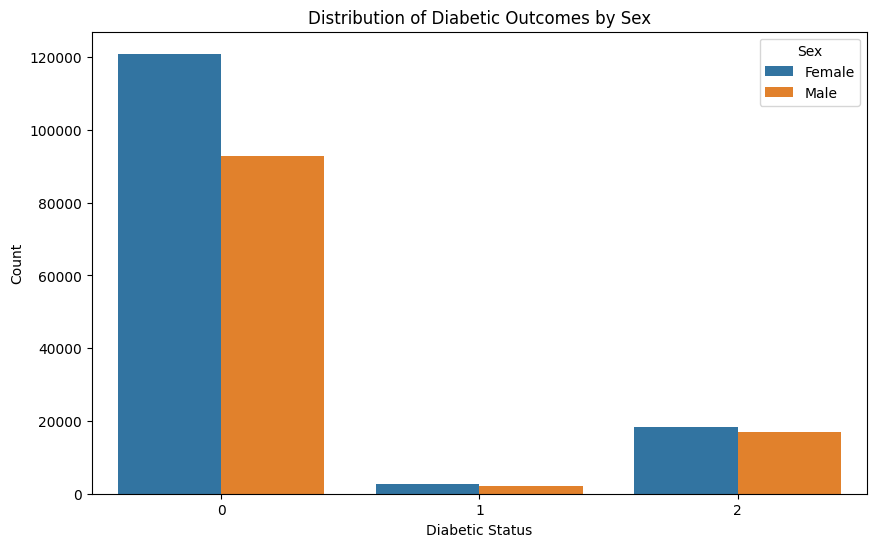

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes_012', hue='Sex', data=df)
plt.title('Distribution of Diabetic Outcomes by Sex')
plt.xlabel('Diabetic Status')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

From the above plot, we can see that the number of females is slightly more than males. While there is a notable difference in the counts, the disproportion does not appear to be extreme. However, this imbalance could still introduce a slight bias in the model's ability to learn and predict diabetic outcomes equitably for both sexes.

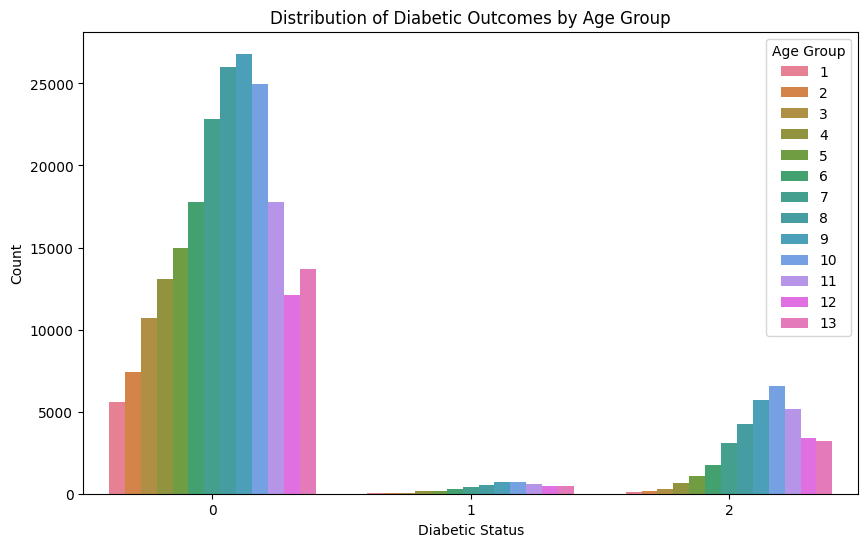

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes_012', hue='Age', data=)
plt.title('Distribution of Diabetic Outcomes by Age Group')
plt.xlabel('Diabetic Status')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

The second chart displays a clear trend of diabetic status across various age groups, with higher ages showing a significant increase in diabetic (2) outcomes. The representation across age groups is more balanced in the non-diabetic (0) status but shows variability in the pre-diabetic (1) and diabetic (2) statuses. This variability might suggest a bias where the model becomes better at predicting outcomes for age groups that are more heavily represented in the non-diabetic category, potentially skewing predictions for younger or older age groups that deviate from the majority. While there is a certain degree of imbalance in the dataset with respect to both sex and age group distributions, the bias introduced by these factors may not be substantial but should not be overlooked.

Adjusting class weights, SMOTE are some common techniques to address the class imbalance issue.